# COVID-19 South Korean dataset

The dataset is retrived from Kaggle available [here](https://www.kaggle.com/kimjihoo/coronavirusdataset) . 
For this plot the PatientRoute.csv and the  and the PatientInfo.csv files are used. 
For the plot the Regions.csv file from the same source is used along with the shp file format retrived [here](https://www.igismap.com/download-south-korea-shapefile/)

The dataset is considered to be a Network where each node is represented by a division of South-Korea at a municipal level where possible or district/country level given the peculiar municipal division ofcities in Korea. The total number of nodes available in the dataset is 210 ofwhich only 183 present at least one connection. 
The connections instead are the patient movements between the 'cities'. The total number of events, ranging from 22/01/2020 to 25/03/2020, is 8093 of which only 3170 are nonloops connection, namely movements outside the municipal level borders


In [5]:
import pandas as pd
import networkx as nx
import collections
import geopandas as gpd
import matplotlib.pyplot as plt

NameError: name 'sns' is not defined

The data manipulated from the two .csv sources are available in data folder

In [6]:
df = pd.read_csv("./data/plot_data.csv")
df.head()

df2 = df.groupby(['sender','receiver'],as_index=False).sum()
df3 = df2.sort_values('increment',ascending=False)
df3.head()

,sender,receiver,Unnamed: 0,latitude,longitude,patient_id,latitude.destination,longitude.destination,increment
738,Incheon - Jung-gu,Seoul - Gangnam-gu,50999,1349.055396,4558.380948,36000016825,1350.443946,4573.502651,36
956,Seoul - Gangnam-gu,Incheon - Jung-gu,66710,1238.107893,4192.558326,33000015349,1236.186296,4172.542958,33
195,Chungcheongnam-do - Asan-si,Chungcheongnam-do - Cheonan-si,12780,1140.485164,3937.075020,127100001116,1141.357474,3940.856239,31
1265,Seoul - Seongdong-gu,Seoul - Jungnang-gu,82426,1089.335033,3684.062763,29000021889,1090.739637,3685.747285,29
203,Chungcheongnam-do - Cheonan-si,Chungcheongnam-do - Asan-si,12130,957.189480,3304.960568,106600000858,956.445297,3302.363146,26


Here the .shp file for plotting the grographical information of South Korea, in order to plot in a good manner the connections. 
And the region file where Latitude and Longitude at the most granural level are reported.

In [10]:
south_korea = gpd.read_file("./data/Igismap/South_Korea_Polygon.shp")
south_korea.head()

regions = pd.read_csv("data/region_modified.csv")
regions.head()

,Unnamed: 0,sender,latitude,longitude
0,1,Seoul - Seoul,37.566953,126.977977
1,2,Seoul - Gangnam-gu,37.518421,127.047222
2,3,Seoul - Gangdong-gu,37.530492,127.123837
3,4,Seoul - Gangbuk-gu,37.639938,127.025508
4,5,Seoul - Gangseo-gu,37.551166,126.849506


Creation of a Directed graph and the node position is created 

In [60]:
G = nx.DiGraph()
for i in range (len(df3)):
    G.add_edge(df3['sender'][i],df3['receiver'][i],weight=1/df3['increment'][i])
G.edges
Provinces = regions['sender'].tolist()
longitude = regions['longitude'].tolist()
latitude = regions['latitude'].tolist()
zipped = list(zip(longitude,latitude))
node_position = dict(zip(Provinces,zipped))

The plot of South Korea

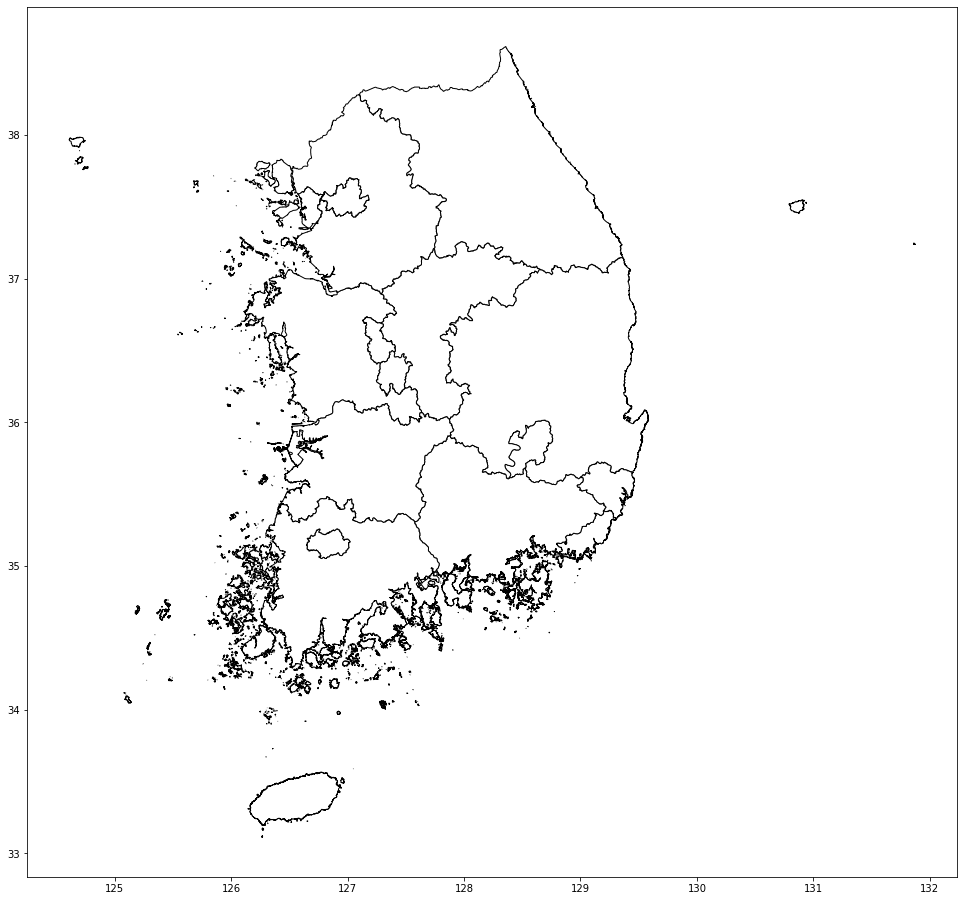

In [15]:
fig, ax = plt.subplots(figsize=(24,16))
ax.set_aspect('equal')
south_korea.plot(ax=ax, color='white', edgecolor='black')


The Plot of South Korea with all the connections with bigger nodes and edges for Outdegree statistic (Count of all outgoing connections). Same reasoning applied to Indegree with similar and almost identical results.

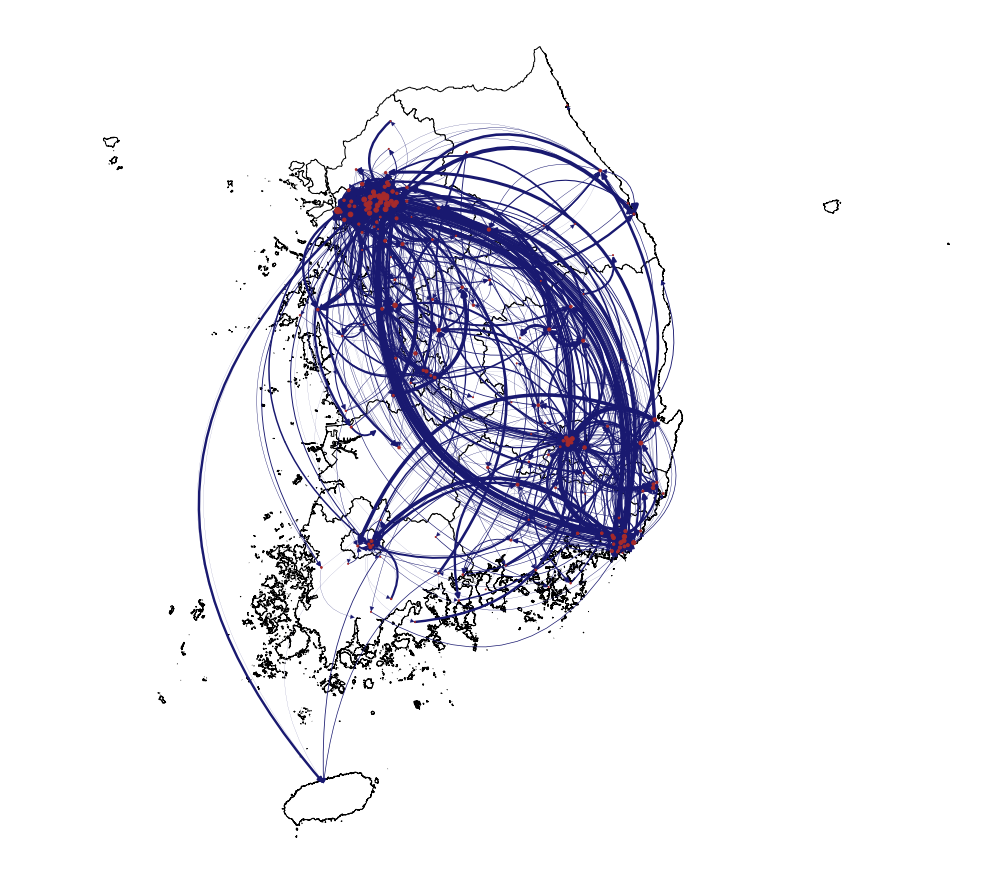

In [61]:
outdeg = G.out_degree()
outdeg_dict = dict(outdeg)

fig, ax = plt.subplots(figsize=(24,16))
ax.set_aspect('equal')
south_korea.plot(ax=ax, color='white', edgecolor='black')
nx.draw(G, ax=ax,node_size=[v for v in outdeg_dict.values()], width = [v/10 for v in outdeg_dict.values()] , with_labels=False, pos=node_position,connectionstyle='arc3, rad=0.5',edge_color='midnightblue',arrowsize=10, node_color='brown')


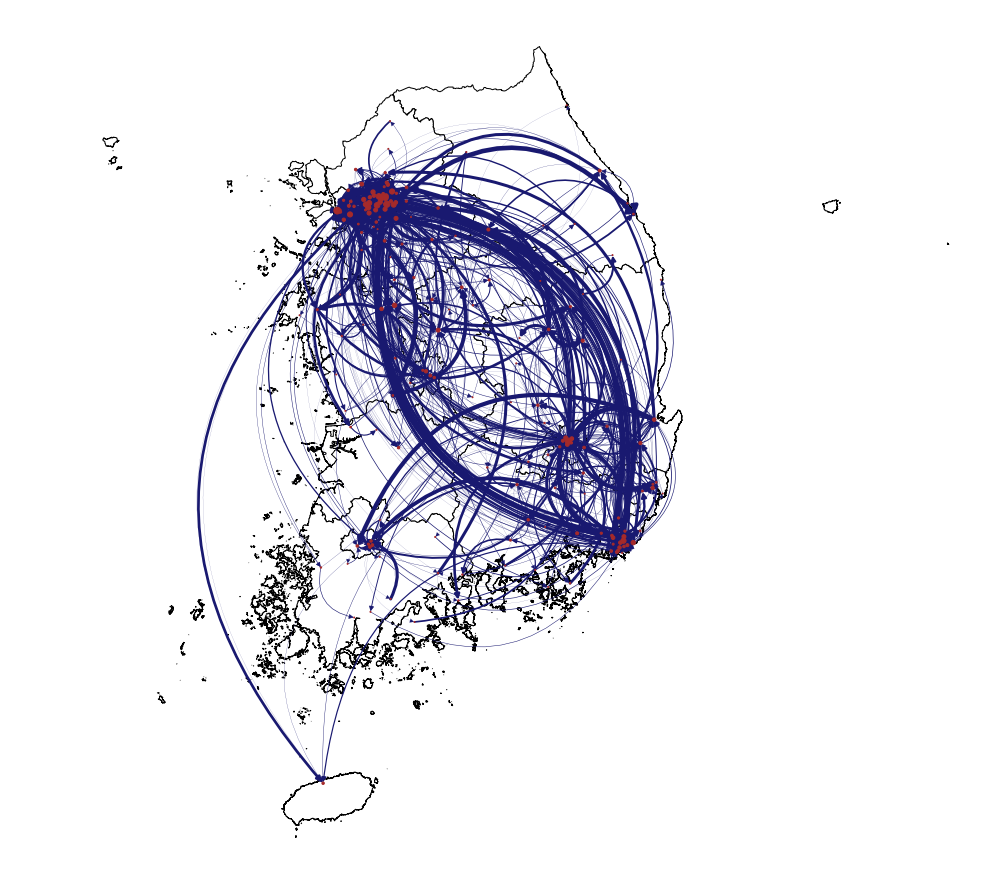

In [62]:
indeg = G.in_degree()
indeg_dict = dict(indeg)

fig, ax = plt.subplots(figsize=(24,16))
ax.set_aspect('equal')
south_korea.plot(ax=ax, color='white', edgecolor='black')
nx.draw(G, ax=ax,node_size=[v for v in indeg_dict.values()], width = [v/10 for v in indeg_dict.values()] , with_labels=False, pos=node_position,connectionstyle='arc3, rad=0.5',edge_color='midnightblue',arrowsize=10, node_color='brown')


Here I only plot the nodes and connection with outdegree greater than 15. 

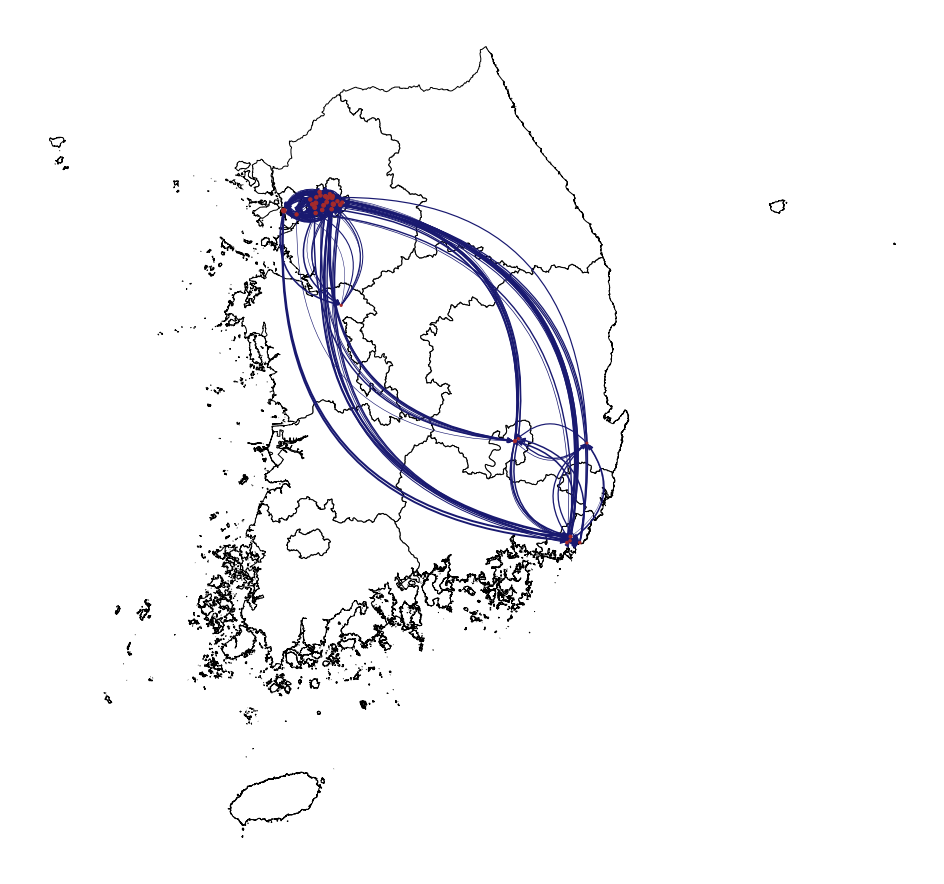

In [63]:
to_remove = [n for (n,deg) in outdeg if deg < 15]
G.remove_nodes_from(to_remove)
outdeg = G.out_degree
outdeg_dict = dict(outdeg)

fig, ax = plt.subplots(figsize=(24,16))
ax.set_aspect('equal')
south_korea.plot(ax=ax, color='white', edgecolor='black')
nx.draw(G, ax=ax,node_size=[v for v in outdeg_dict.values()], width = [v/10 for v in outdeg_dict.values()] , with_labels=False, pos=node_position,connectionstyle='arc3, rad=0.5',edge_color='midnightblue',arrowsize=10, node_color='brown')